# **1. Web Scraping**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

query = "Watch"
num_pages = 8
base_url = "https://www.amazon.in/s?k=watch&crid=3AWG0P629XE0D&qid=1762143975&sprefix=watch%2Caps%2C709&xpid=me-96BhoTufu8&ref=sr_pg_1"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.google.com/",
    "DNT": "1",
    "Connection": "keep-alive"
}


#SCRAPE DATA

all_data = []

for page in range(1, num_pages + 1):
    print(f"\n🔹 Scraping Page {page}...")
    params = {"k": query, "page": page}
    response = requests.get(base_url, headers=headers, params=params)

    # detect block
    if "Robot Check" in response.text or "captcha" in response.text.lower():
        print(f"Blocked by Amazon on page {page}. Skipping...")
        continue

    soup = BeautifulSoup(response.text, "html.parser")
    items = soup.select("div[data-component-type='s-search-result']")

    if not items:
        print("No products found on this page.")
        continue

    for item in items:
        # --- Product Name ---
        name_tag = item.h2
        product_name = name_tag.text.strip() if name_tag else "N/A"

        # --- Price ---
        price_tag = item.select_one("span.a-price-whole")
        price = price_tag.text.strip().replace(",", "") if price_tag else "N/A"

        # --- Ratings ---
        rating_tag = item.select_one("span.a-icon-alt")
        rating = rating_tag.text.strip() if rating_tag else "N/A"

        # --- Number of Reviews ---
        reviews_tag = item.select_one("span[aria-label$='ratings']")
        reviews = reviews_tag.text.strip() if reviews_tag else "N/A"

        # --- Category (from query) ---
        category = query.capitalize()

        all_data.append({
            "Product Name": product_name,
            "Price": price,
            "Category": category,
            "Ratings": rating,
            "Number of Reviews": reviews
        })

    time.sleep(3)




df = pd.DataFrame(all_data)

if not df.empty:
    df.to_csv("amazon_dataset.csv", index=False, encoding="utf-8-sig")
    print("\n Data saved successfully to amazon_dataset.csv")
    print(df.head())
else:
    print("\n No data scraped. Try again or change keyword.")



🔹 Scraping Page 1...

🔹 Scraping Page 2...

🔹 Scraping Page 3...

🔹 Scraping Page 4...

🔹 Scraping Page 5...

🔹 Scraping Page 6...

🔹 Scraping Page 7...

🔹 Scraping Page 8...
No products found on this page.

 Data saved successfully to amazon_dataset.csv
  Product Name Price Category             Ratings Number of Reviews
0       Matrix   297    Watch  3.8 out of 5 stars               N/A
1       Fossil  9421    Watch  4.2 out of 5 stars               N/A
2        Casio  1895    Watch  4.4 out of 5 stars               N/A
3        Noise  1499    Watch  4.0 out of 5 stars               N/A
4       Matrix   298    Watch  4.0 out of 5 stars               N/A


# **2. Data Cleaning**


In [ ]:
import numpy as np
df = pd.read_csv("amazon_dataset.csv")
df.head()




,Product Name,Price,Category,Ratings,Number of Reviews
0,Matrix,297.0,Watch,3.8 out of 5 stars,NaN
1,Fossil,9421.0,Watch,4.2 out of 5 stars,NaN
2,Casio,1895.0,Watch,4.4 out of 5 stars,NaN
3,Noise,1499.0,Watch,4.0 out of 5 stars,NaN
4,Matrix,298.0,Watch,4.0 out of 5 stars,NaN


In [ ]:
df.shape

(306, 5)

In [ ]:
# Handle missing values
df.dropna(subset=["Product Name"], inplace=True)


In [ ]:
# Clean and standardize
df['Price'] = df['Price'].astype(str).str.replace('[^0-9.]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Ratings'] = df['Ratings'].astype(str).str.extract(r'(\d+\.\d+|\d+)')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Number of Reviews'] = df['Number of Reviews'].astype(str).str.replace(',', '', regex=True)
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

In [ ]:

# Remove duplicates
df.drop_duplicates(subset=["Product Name"], inplace=True)

# Fill missing values
df["Ratings"].fillna(df["Ratings"].mean(), inplace=True)
df["Number of Reviews"].fillna(0, inplace=True)



/tmp/ipython-input-259162109.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ratings"].fillna(df["Ratings"].mean(), inplace=True)
/tmp/ipython-input-259162109.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:

# Add a 'Category' column manually (if not scraped)
df["Category"] = "Watch "

# Save cleaned data
df.to_csv("amazon_cleaned_data.csv", index=False)
print(" Cleaned data saved as amazon_cleaned_data.csv")


 Cleaned data saved as amazon_cleaned_data.csv




### EDA (Exploratory Data Analysis):

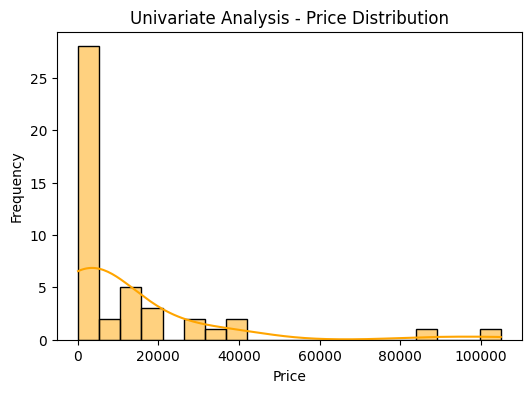

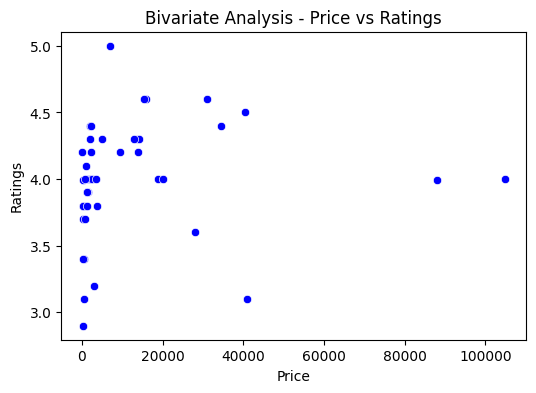

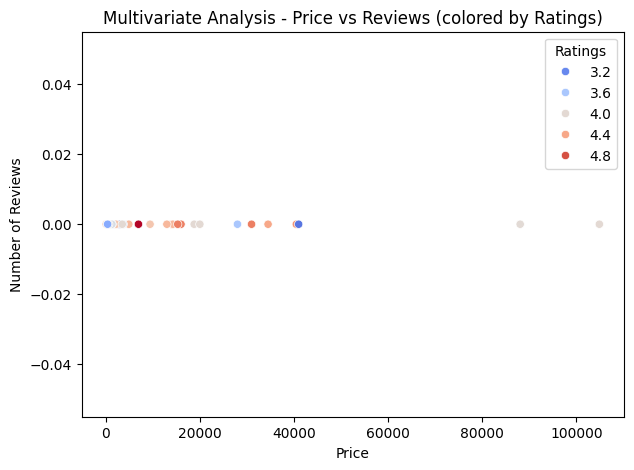

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon_cleaned_data.csv")


# UNIVARIATE ANALYSIS
# Analyze one variable (Price)
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], bins=20, kde=True, color='orange')
plt.title("Univariate Analysis - Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()



# BIVARIATE ANALYSIS
# Relationship between two variables (Price vs Ratings)
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price', y='Ratings', data=df, color='blue')
plt.title("Bivariate Analysis - Price vs Ratings")
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()



# MULTIVARIATE ANALYSIS
# Relationship between three variables (Price, Reviews, Ratings)
plt.figure(figsize=(7,5))
sns.scatterplot(x='Price', y='Number of Reviews', hue='Ratings', data=df, palette='coolwarm')
plt.title("Multivariate Analysis - Price vs Reviews (colored by Ratings)")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.show()

# **3. Data Storage**

In [ ]:
#Create a database file:

import sqlite3
conn = sqlite3.connect('ecommerce.db')
df.to_sql('products', conn, if_exists='replace', index=False)


47

In [ ]:
#verify storage
pd.read_sql_query("SELECT * FROM products LIMIT 5", conn)


,Product Name,Price,Category,Ratings,Number of Reviews
0,Matrix,297.0,Watch,3.8,0.0
1,Fossil,9421.0,Watch,4.2,0.0
2,Casio,1895.0,Watch,4.4,0.0
3,Noise,1499.0,Watch,4.0,0.0
4,Titan,1906.0,Watch,4.3,0.0


## **4.Unsupervised Learning**


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load cleaned data
df = pd.read_csv("amazon_cleaned_data.csv")

# Features for clustering
X = df[["Price", "Ratings", "Number of Reviews"]].fillna(0)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Save clustered data
df.to_csv("amazon_clustered_data.csv", index=False)
print("Clustering complete. File saved as amazon_clustered_data.csv")


Clustering complete. File saved as amazon_clustered_data.csv


## Visualize the clusters

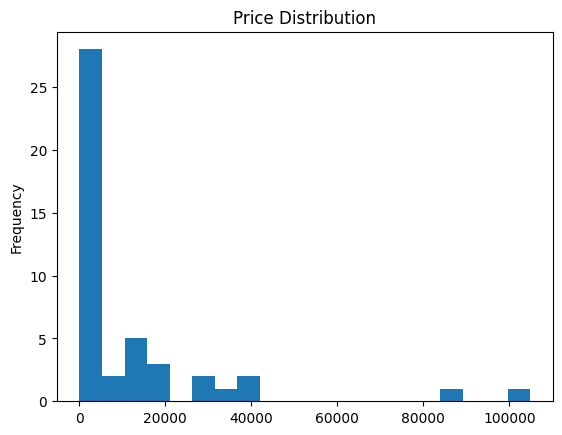

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("amazon_cleaned_data.csv")
df["Price"].plot(kind="hist", bins=20, title="Price Distribution")
plt.show()


# **5.Supervised Learning**



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the clustered data
df = pd.read_csv("amazon_clustered_data.csv")

# Features and target
X = df[["Price", "Ratings", "Number of Reviews"]]
y = df["Cluster"]

# Split into training & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

model_accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc
    print(f"\n📘 {name} - Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...

📘 Logistic Regression - Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Training SVM...

📘 SVM - Accuracy: 0.700
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.70      1.00      0.82         7
           2       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.23      0.33      0.27        10
weighted avg       0.49      0.70      0.58        10

Training k-NN...

📘 k-NN - Accuracy: 0.800
              precision    recall  f1-score   support

           0       1.00   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


📘 Random Forest - Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Training XGBoost...

📘 XGBoost - Accuracy: 0.900
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.88      1.00      0.93         7
           2       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.62      0.67      0.64        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


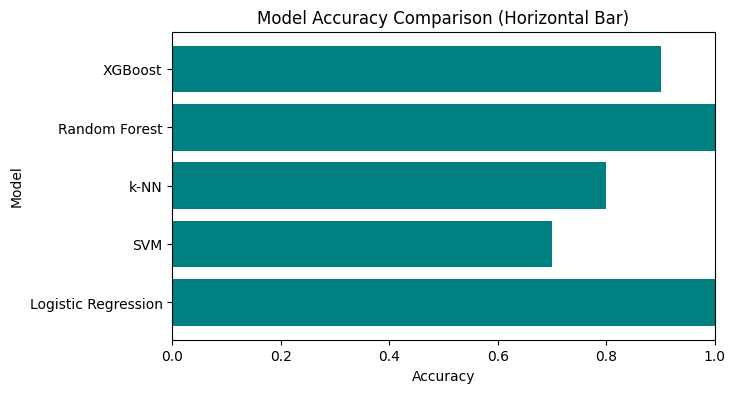

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='teal')
plt.title("Model Accuracy Comparison (Horizontal Bar)")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Define the best model based on previous hyperparameter tuning or selection
# Using RandomForestClassifier as it was previously tuned.
model = RandomForestClassifier(random_state=42)

# Define a parameter grid for cross-validation.
# This can be the same as or more refined than the previous param_grid.
param_grid_cv = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Using StratifiedKFold to handle potential class imbalance, if any.
# Given the small dataset, cv=3 is chosen to avoid very small splits.
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform GridSearchCV with cross-validation
grid_search_cv = GridSearchCV(estimator=model, param_grid=param_grid_cv, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
grid_search_cv.fit(X, y) # Using the full dataset X and y for robust cross-validation

print("Cross-validation complete.")
print("Best Parameters from CV:", grid_search_cv.best_params_)
print("Best Cross-validated Accuracy:", grid_search_cv.best_score_)

# Evaluate on the best estimator found by GridSearchCV
best_cv_model = grid_search_cv.best_estimator_
y_pred_cv = best_cv_model.predict(X_test_imputed)
accuracy_cv = accuracy_score(y_test, y_pred_cv)

print(f"\nAccuracy of Best CV Model on Test Set: {accuracy_cv:.3f}")
print("\nClassification Report for Best CV Model:")
print(classification_report(y_test, y_pred_cv))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Cross-validation complete.
Best Parameters from CV: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-validated Accuracy: 0.9791666666666666

Accuracy of Best CV Model on Test Set: 1.000

Classification Report for Best CV Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### **Evaluate Model Performance:**

Use metrics like Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.88      1.00      0.93         7
           2       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.62      0.67      0.64        10
weighted avg       0.81      0.90      0.85        10

[[2 0 0]
 [0 7 0]
 [0 1 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **6.Hyperparameter Tuning**
Select the best-performing model (based on accuracy/F1-score).

Use GridSearchCV or RandomizedSearchCV to find the best parameters:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.95
